In [6]:
from sklearn.preprocessing import LabelEncoder
from imutils import paths
from sklearn.model_selection import train_test_split
import os
import numpy as np
import cv2


In [3]:
#define some needed function
def image_to_features_vector (image, size=(32,32)):
    return cv2.resize(image,size).flatten()

In [4]:
imagePaths=list(paths.list_images('dogs_and_cats/train'))
len(imagePaths)

25000

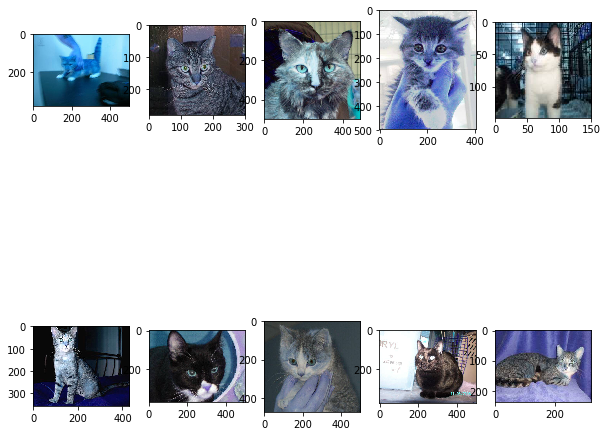

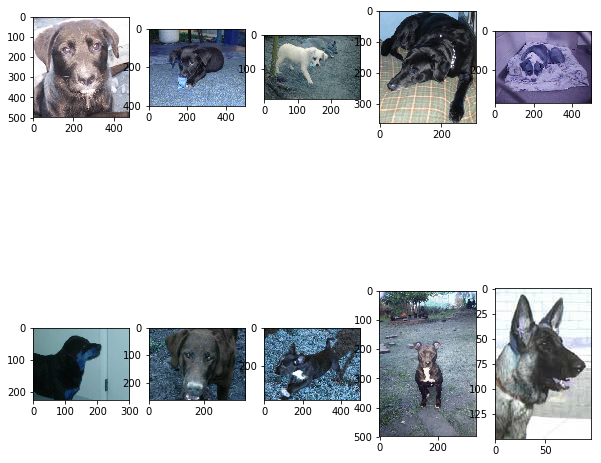

In [8]:
import matplotlib.pyplot as plt
#explore the first 25 images in the traing set
plt.figure(figsize=(10,10))
for i,imagePath in enumerate (imagePaths[:10]):
    image=cv2.imread(imagePath)
    plt.subplot(2,5,i+1)
    plt.imshow(image)
plt.figure(figsize=(10,10))
for i,imagePath in enumerate (imagePaths[-10:]):
    image=cv2.imread(imagePath)
    plt.subplot(2,5,i+1)
    plt.imshow(image)

In [9]:
data=[]
labels=[]
for i,imagePath in enumerate (imagePaths):
    image=cv2.imread(imagePath)
    feature=image_to_features_vector(image)
    label=imagePath.split(os.path.sep)[-1].split('.')[0]
    data.append(feature)
    labels.append(label)
    

In [12]:
#converting the labels to 0 and 1 representing dog and cat respectively
le=LabelEncoder()
labels=le.fit_transform(labels)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [15]:
from keras.utils import np_utils
data=np.array(data)/255.0
labels = np_utils.to_categorical(labels, 2)

Using TensorFlow backend.


In [17]:
x_train=data
y_train=labels

In [19]:
#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten,Dense
import tensorflow as tf

In [20]:
#add model, create desirable no of dense layers
model=Sequential()
model.add(Dense(64,input_dim=3072,activation=tf.nn.relu))
model.add(Dense(64,activation=tf.nn.relu))
model.add(Dense(2,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
#compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
#use the model to train the traning set
model.fit(x_train,y_train,epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
25000/25000 [==============================] - 33s 1ms/step - loss: 0.6857 - acc: 0.5491
Epoch 2/5
25000/25000 [==============================] - 15s 585us/step - loss: 0.6630 - acc: 0.6014
Epoch 3/5
25000/25000 [==============================] - 15s 587us/step - loss: 0.6527 - acc: 0.61530s - loss: 0.6526 - acc: 0.61
Epoch 4/5
25000/25000 [==============================] - 15s 616us/step - loss: 0.6458 - acc: 0.6230
Epoch 5/5
25000/25000 [==============================] - 15s 592us/step - loss: 0.6416 - acc: 0.62741s - loss: 0.6422 - ac - ETA: 0s - loss: 0.6422 - 
